<a href="https://colab.research.google.com/github/henrycgbaker/Debt_Settlement_App/blob/main/tutorial_notebook_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![cover](https://drive.google.com/uc?id=1E1ryF0cozEJNRrVU33Dse394l7Qfb6j0)

# Tutorial Notebook: Uncertainty in Deep Learning
## GRAD-E1394 Deep Learning -- Assignment 3
Author(s):
*   Carol Sobral, sobral@hertie-school.org
*   Henry Baker, h.baker@students.hertie-school.org
*   Milton Mier Santander m.mier-santander@students.hertie-school.org>
*   Johanna Mehler, j.mehler@students.hertie-school.org

This tutorial shows the implementation of three different uncertainty estimation methods in deep learning. Readers will get an overview of the political relevance of the topic, a brief theoretical background about uncertainty in deep learning, as well as the functionality and implementation of the individual methods on a sample dataset. The example dataset for face recognition reflects a high-risk application where uncertainty estimation could be helpful and important.



# Table of Contents


*   [Memo](#memo)
*   [Overview](#overview)
*   [Background & Prerequisites](#background-and-prereqs)
*   [Software Requirements](#software-requirements)
*   [Data Description](#data-description)
*   [Model](#Model)
*   [Results & Discussion](#results-and-discussion)
*   [References](#references)


<a name="memo"></a>
# Memo

Decision-making based on machine learning systems is a topic of highest interest in the machine learning community and related policy fields, especially when these decisions can have an impact on people's lives. Thus, uncertainty estimation in machine learning holds critical relevance for public policy, especially in fields where decisions have high stakes, heterogeneous data sources, or limited labeled data. This approach enhances the reliability and safety of automated decision-making processes, making it essential for government and organizational policymaking.

Why It Matters:
1. Safer Decision-Making in High-Risk Fields: Uncertainty estimation enables practitioners to gauge the reliability of ML predictions. For instance, in healthcare policy, predictive models estimating the severity of diseases must also convey how certain they are about their predictions to avoid overconfident misdiagnoses.

2. Handling Inhomogeneous Data: Public policy often relies on fragmented and diverse data sources. For instance, environmental policy addressing climate risks integrates data from sensors, simulations, and human reports. Uncertainty-aware systems can better navigate and integrate these diverse datasets.

3. Incorporation in Advanced Learning Techniques: Active learning and reinforcement learning—methods often used for resource optimization and adaptive policymaking—benefit from uncertainty estimates to focus learning on the most ambiguous and impactful scenarios.

Applications can be found, for example, in the healthcare sector to diagnose diseases, in mobility to improve safety in autonomous driving, or in climate policy, to assess the risks of climate impacts.




<a name="overview"></a>
# Overview

<img src="https://drive.google.com/uc?id=1HjKCJIWTliqEZECLaSb7H6-Mm7phqXwB" alt="softmax" width="500">

## Uncertainty Methods covered in this tutorial:

* **Test-Time Augmentation (TTA)**: Perform multiple forward passes with augmented versions of the same image and calculate the prediction variance.

* **Monte Carlo Dropout (MC Dropout)**: Utilize dropout layers during inference to estimate uncertainty. No architectural changes are needed if the model already has dropout layers.

* **Deep Ensembles**: Train multiple independent models and compute the variance of their predictions to estimate uncertainty. This requires training multiple models, which is computationally expensive.

What this tutorial does not cover:

* **Bayesian Neural Networks (BNNs)**: Replace standard neural network layers with Bayesian ones. Libraries like Pyro or TensorFlow Probability can help but may require a complete reimplementation of the model.

## When do you use which method?

Kendall & Gal (2017) distinguish between aleatoric uncertainty, inherent in observations, and epistemic uncertainty, related to model uncertainty. The table below shows characteristics and use cases for the methods presented in this tutorial: How they fit into these categories, what their strengths and weaknesses are, and use cases.

![table](https://drive.google.com/uc?id=1W9MEOT0fsNF99opl0W0kqLEMKPBeJADR)


<a name="background-and-prereqs"></a>
# Background & Prerequisites

## Context: Uncertainty Estimation as a Subfield of Calibration in Deep Learning
Uncertainty estimation, also called Uncertainty Quantification (Abdar et al., 2021), belongs to the “Calibration" field, a term used for the general problem of under- and overconfidence of neural networks, when “the model predicted class probabilities do not faithfully estimate the true correctness likelihood” (Wang, 2024). The phenomenon is present even in high-performing models with great accuracy - or better: especially in those models - because “while increasing the depth and width of neural networks helps to obtain highly predictive power, it also negatively increases calibration errors.” (Wang, 2024). In more detail: When maximizing model performance through more training, models are pushed to minimize the negative log-likelihood (NLL), bringing the predicted softmax probability distribution as close as possible to the onehot representation of the ground truth. This leads to over-confidence for the predicted class and a lack of interpretative power of the softmax distribution, as one can see in the Figure below: High confidence for bad predictions when images are augmented (in this case heavily rotated).

<img src="https://drive.google.com/uc?id=1-P9D0dSb5sNEV25I77nQVyZaj-LjByc5" alt="softmax" width="300">


For more roots of bad calibration (including data issues and regularization) and details on model complexity as a reason check out [Wang, 2024](https://arxiv.org/abs/2308.01222), which gives a great overview of theory, methods, and measurement of calibration. Only so much: calibration can be addressed from many different positions in the data science workflow. Already when training the model for this tutorial, you will see that we augment data and add noise to training samples to support the mitigation of model miscalibration from the start.

## Background: Theoretical Idea of Full Bayesian Inference ("BDL")

The core idea of Bayesian Neural Networks (BNNs) is that all model parameters are treated as probability distributions.
BNNs represent the optimal approach for capturing uncertainty, but are computationally infeasible for DL due to integrals.

<img src="https://drive.google.com/uc?id=1T-POTuUW_rjHeH4A2p2FdzL_VBBzHzyF" alt="softmax" width="700">

## Uncertainty Methods - Theory

### Test-Time Augmentation (TTA)
Involves applying augmentations to the input image during inference and analyzing the variability in predictions.

<img src="https://drive.google.com/uc?id=1Q4WkhroLO6gvnc0HO23lDrq8Uxk7ev6P" alt="softmax" width="700">

### Monte Carlo Dropout (MC Dropout)
Utilize dropout layers during inference to estimate uncertainty. No architectural changes are needed if the model already has dropout layers.

<img src="https://drive.google.com/uc?id=1N0BHfQxVVOeXS8RteoQ1kwZwWVdjmQTU" alt="softmax" width="700">

### Deep Ensembles
Deep Ensembles involve using multiple independently trained models to make predictions and then computing the variance across these predictions to estimate uncertainty.

<img src="https://drive.google.com/uc?id=1MwAvMl0kWKPA2rWnwhWISgeXf9sBBkVD" alt="softmax" width="700">




# Recommended Reading Materials on Uncertainty Estimation in DL

- More on Uncertainty Methods in DL: [A Survey on Uncertainty Estimation in Deep Learning. Classification Systems from a Bayesian Perspective](https://diposit.ub.edu/dspace/bitstream/2445/183476/1/714838.pdf) - José Mena, Oriol Pujol, Jordi Vitrià (2022)

- More Evaluation and Comparison of Uncertainty Methods: [Evaluation of Uncertainty Quantification in Deep Learning](https://www.semanticscholar.org/paper/Evaluation-of-Uncertainty-Quantification-in-Deep-St%C3%A5hl-Falkman/4f8690e5db4ae32b8df9d320cd3091f04e6ab357) - Ståhl et al. (2020)

- Blogpost: [Why Calibration matters](https://www.unofficialgoogledatascience.com/2021/04/why-model-calibration-matters-and-how.html) - Lee Richardson & Taylor Pospisil (2021)

- Understanding & Implementing the Expected Calibration Error (Blogpost and Python Code) [Expected Calibration Error (ECE): A Step-by-Step Visual Explanation](https://towardsdatascience.com/expected-calibration-error-ece-a-step-by-step-visual-explanation-with-python-code-c3e9aa12937d) - Maja Pavlovic (2023)

- GitHub Repository with a huge collection of resources (literature, blogposts, lectures, tutorials and more) on uncertainty in DL: [Awesome Uncertainty in Deep learning](https://github.com/ENSTA-U2IS-AI/awesome-uncertainty-deeplearning?tab=readme-ov-file#lectures-and-tutorials)


  






<a name="software-requirements"></a>
# Software Requirements

In [ ]:
# Standard lib
import copy
import os
import time
import warnings

# Data processing
import numpy as np
import pandas as pd
from tqdm import tqdm

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split

# Image
from PIL import Image
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage, ToTensor
import timm

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML utils
from sklearn.calibration import calibration_curve

# Disable warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Set seeds
seed = 123
torch.manual_seed(seed)
np.random.seed(seed)

# Data

This tutorial uses an adapted version of the CelebFaces Attributes Dataset (CelebA), a widely-used image dataset containing over 200,000 images across 10,177 identities. CelebA is known for its large variability in pose and background clutter, making it a valuable resource for testing robust models.

For this tutorial, a subset of approximately 9,000 images spanning 300 unique identities (with at least 30 samples per identity) was selected to balance computational efficiency and dataset diversity. This reduced dataset is compact (under 100MB) and ideal for running experiments in resource-constrained environments such as Colab, while retaining enough variability for meaningful model evaluation.

The script `celeba_dataset_processing.py` contains the steps to create this dataset.




## Download

Here, the dataset file is downloaded, extracted, and the zip file is removed. The dataset directory is then defined for further use.

In [ ]:
# Download dataset file
!gdown 1aRMM1cdvjXv8mke5Dd4hrgHNA3ZTkOc7
!unzip -q celeba_300.zip
!rm celeba_300.zip
dataset_dir = "celeba_300"

Downloading...
From (original): https://drive.google.com/uc?id=1aRMM1cdvjXv8mke5Dd4hrgHNA3ZTkOc7
From (redirected): https://drive.google.com/uc?id=1aRMM1cdvjXv8mke5Dd4hrgHNA3ZTkOc7&confirm=t&uuid=1475b627-10a2-4acf-946a-18f57176fa4a
To: /content/celeba_300.zip
100% 66.0M/66.0M [00:00<00:00, 248MB/s]


## Dataset and Data Loader

This section defines the `CelebADataset` class for managing the dataset and applies appropriate transformations for training and testing. The transformations include:

- **Resizing:** Adjusts images to a standard size of 224x224 pixels.  
- **Random Horizontal Flip:** Flips images horizontally with a 50% probability during training.  
- **Affine Transformations:** Applies random rotations (±10°), translations (up to 10%), scaling (85%-115%), and fills edges with white.  
- **Perspective Warping:** Adds moderate perspective distortion with a 50% chance.  
- **Color Jittering:** Adjusts brightness, contrast, and saturation by small random amounts.  
- **Gaussian Blur:** Applies slight blurring using a 3x3 kernel.  
- **Random Noise:** Adds 2% Gaussian noise to the image.  
- **Random Erasing:** Randomly removes patches of the image with a 20% probability.  
- **Normalization:** Standardizes pixel values using ImageNet statistics for consistency.  

The data loaders split the dataset into training and testing sets and batch them for model input.


In [ ]:
# Dataset and Loader
class CelebADataset(Dataset):
    def __init__(self, metadata, train=True, root_dir=dataset_dir):
        # Initialize dataset
        self.metadata = metadata
        self.root_dir = root_dir
        self.train = train

        # Basic transform for testing
        self.test_transform = transforms.Compose([
            transforms.Resize((224, 224)),    # Resize image to standard input size
            transforms.ToTensor(),
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406],   # Normalize using ImageNet stats -- MobileNet trained on ImageNet
                std=[0.229, 0.224, 0.225]
            )
        ])

        # Augmented transform for training
        self.train_transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.RandomHorizontalFlip(p=0.5),     # Flip horizontally 50% of time
            transforms.RandomAffine(                    # Stronger geometric transforms
                degrees=(-10, 10),                      # Rotate ±10°
                translate=(0.1, 0.1),                   # Shift up to 10% any direction
                scale=(0.85, 1.15),                     # Scale 85-115% of original
                fill=255                                # Fill edges white
            ),
            transforms.RandomPerspective(               # Perspective warping
                distortion_scale=0.2,                   # Moderate distortion
                p=0.5                                   # 50% chance to apply
            ),
            transforms.ColorJitter(                     # Enhanced color augmentation
                brightness=0.3,                         # ±30% brightness variation
                contrast=0.3,                           # ±30% contrast variation
                saturation=0.2,                         # ±20% saturation variation
            ),
            transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 0.5)),  # Slight blur
            transforms.ToTensor(),                      # Convert to tensor
            transforms.Lambda(lambda x: x + torch.randn_like(x) * 0.02),  # 2% noise
            transforms.RandomErasing(                   # Random patch removal
                p=0.2,                                  # 20% chance to erase
                scale=(0.02, 0.10)                      # Erase 2-15% of image
            ),
            transforms.Normalize(                       # ImageNet normalization
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]
            )
        ])

    def __len__(self):
        return len(self.metadata)

    def __getitem__(self, idx):
        # Access metadata
        img_data = self.metadata[idx]
        img_path = os.path.join(self.root_dir, "images", img_data["img_name"])

        # Load image
        image = Image.open(img_path)

        # Apply appropriate transform
        if self.train:
            image = self.train_transform(image)
        else:
            image = self.test_transform(image)

        return image, img_data["identity"]


def create_data_loaders(batch_size=64, train_split=0.8):
    # Load metadata
    info = torch.load(os.path.join(dataset_dir, "dataset_info.pt"))
    metadata = info["metadata"]
    n_classes = info["n_classes"]

    # Calculate splits
    train_size = int(train_split * len(metadata))
    test_size = len(metadata) - train_size

    # Create index splits
    train_indices, test_indices = torch.utils.data.random_split(
        list(range(len(metadata))),
        [train_size, test_size],
        generator=torch.Generator().manual_seed(42)
    )

    # Create metadata splits
    train_metadata = [metadata[i] for i in train_indices]
    test_metadata = [metadata[i] for i in test_indices]

    # Create dataset instances
    train_dataset = CelebADataset(metadata=train_metadata, train=True)
    test_dataset = CelebADataset(metadata=test_metadata, train=False)

    # Create loaders
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=2
    )

    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=2
    )

    print(f"Training samples: {len(train_dataset)}")
    print(f"Testing samples: {len(test_dataset)}")

    return train_loader, test_loader, n_classes, train_dataset, test_dataset, train_metadata, test_metadata

# Use
train_loader, test_loader, n_classes, train_dataset, test_dataset, train_metadata, test_metadata = create_data_loaders(batch_size=64)

Training samples: 7230
Testing samples: 1808


## Identity Distribution Visualization

Here, the sample counts per identity are calculated for training and testing datasets, and a stacked bar plot compares their distribution. Blue bars indicate training samples, and orange bars stacked above them represent testing samples.


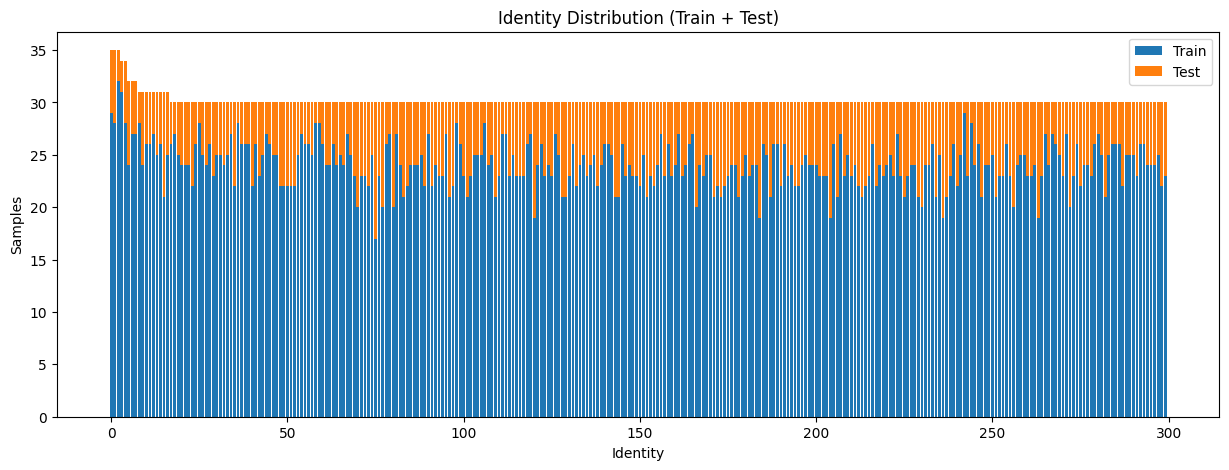

In [ ]:
# Count samples per identity
train_counts = {}
test_counts = {}

for item in train_metadata:
   train_counts[item["identity"]] = train_counts.get(item["identity"], 0) + 1

for item in test_metadata:
   test_counts[item["identity"]] = test_counts.get(item["identity"], 0) + 1

# Get unique identities and sort them
all_ids = sorted(set(list(train_counts.keys()) + list(test_counts.keys())))

# Create arrays for stacked bars
train_values = [train_counts.get(id, 0) for id in all_ids]
test_values = [test_counts.get(id, 0) for id in all_ids]

plt.figure(figsize=(15, 5))
plt.bar(all_ids, train_values, label='Train')
plt.bar(all_ids, test_values, bottom=train_values, label='Test')
plt.title('Identity Distribution (Train + Test)')
plt.xlabel('Identity')
plt.ylabel('Samples')
plt.legend()
plt.show()

## Dataset Visualization

This visualizes a subset of denormalized images with their IDs, showing augmented training and non-augmented test data.


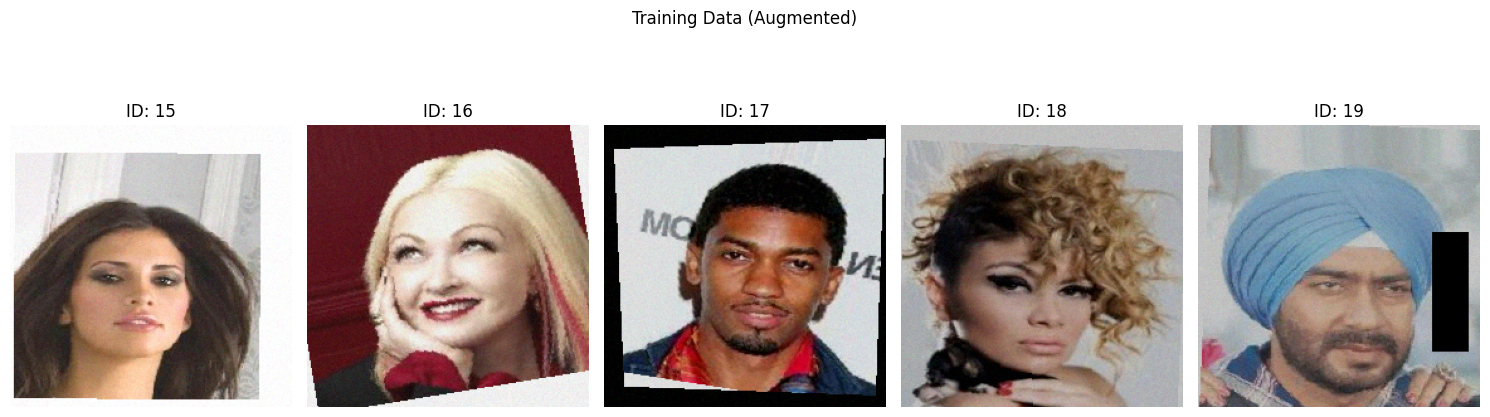

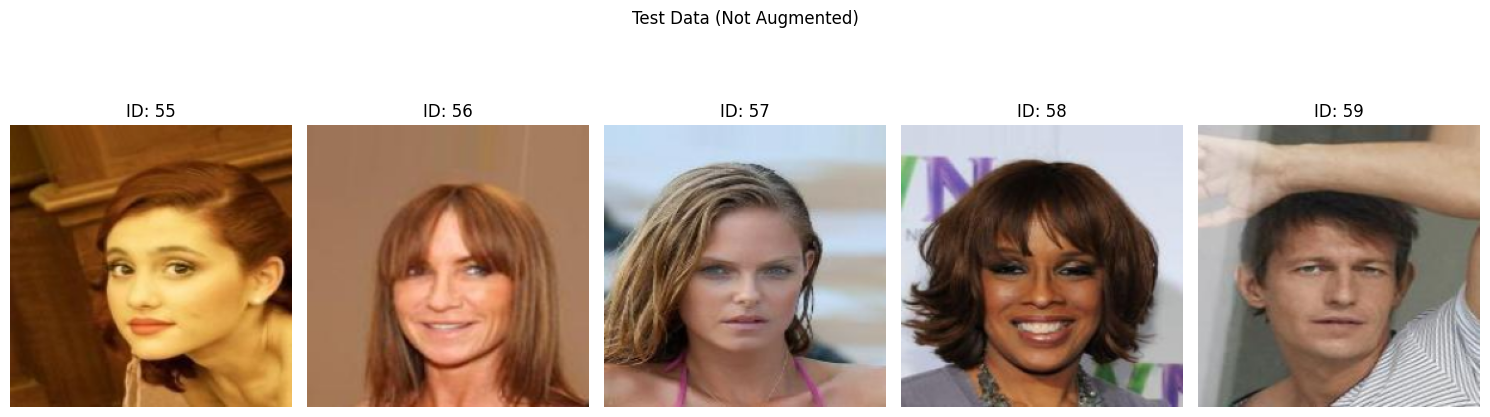

In [ ]:
def visualize_dataset(dataset, title, start_idx=0, num_images=5):
   mean = [0.485, 0.456, 0.406]
   std = [0.229, 0.224, 0.225]
   plt.figure(figsize=(15, 5))
   for i in range(start_idx, start_idx + num_images):
       image, _ = dataset[i]
       image = image.clone()
       for t, m, s in zip(image, mean, std):
           t.mul_(s).add_(m)
       image = image.permute(1, 2, 0).cpu().numpy().clip(0, 1)
       plt.subplot(1, num_images, i - start_idx + 1)
       plt.imshow(image)
       plt.axis('off')
       plt.title(f"ID: {i}")
   plt.suptitle(title)
   plt.tight_layout()
   plt.show()

# Use
visualize_dataset(train_dataset, "Training Data (Augmented)", start_idx=15)
visualize_dataset(test_dataset, "Test Data (Not Augmented)", start_idx=55)

# Model

The tutorial uses three pretrained deep learning models — DenseNet121, Inception-ResNet-v2, and EfficientNetV2-S — to demonstrate uncertainty estimation techniques. These models are already trained on the dataset, with training code included (but commented out) for those interested in retraining.

- **DenseNet121** is used for Test-Time Augmentation (TTA) and Monte Carlo (MC) Dropout due to its efficient, densely connected architecture.  
- **Inception-ResNet-v2** combines Inception modules and residual connections, making it suitable for ensemble methods.  
- **EfficientNetV2-S** is a compact yet high-performing model from the EfficientNet family, also used for the ensemble approach.

## Model Definition

Defines the `FaceClassifier` class for classification tasks, integrating pretrained models and a customizable dropout rate. Includes functions for training over one epoch and evaluating performance on test data.


In [ ]:
# Model class
class FaceClassifier(nn.Module):
    def __init__(self, model_name, num_classes, dropout_rate=0.3):
        super().__init__()
        self.model = timm.create_model(
            model_name,
            pretrained=True,
            num_classes=num_classes,
            drop_rate=dropout_rate
        )

        # Set dropout rate for all dropout layers
        for m in self.model.modules():
            if isinstance(m, (nn.Dropout, nn.Dropout2d)):
                m.p = dropout_rate

    def enable_dropout(self):
        self.train()
        for m in self.model.modules():
            if isinstance(m, (nn.Dropout, nn.Dropout2d)):
                m.train()

    def forward(self, x):
        return self.model(x)


def train_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in tqdm(train_loader, desc="Training"):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    accuracy = 100.0 * correct / total
    return running_loss / len(train_loader), accuracy

# Evaluation function
def evaluate(model, test_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc="Evaluating"):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    accuracy = 100.0 * correct / total
    return running_loss / len(test_loader), accuracy

## Model Training

This block can be used to train three pretrained models — DenseNet121, Inception-ResNet-v2, and EfficientNetV2-S — for 35 epochs or until early stopping is triggered. Dropout is active during training to improve generalization. Key features include:

- **Optimization:** Uses AdamW optimizer, CrossEntropyLoss with label smoothing, and a learning rate scheduler.  
- **Early Stopping:** Monitors validation loss to stop training if no improvement is observed for 5 epochs.  
- **Best Model Saving:** Saves the best-performing model for each architecture, including its state and metrics.  

Training takes approximately **2.5 hours.**


In [ ]:
# =============================================================================
# NOTE: Remove the line below if you wish to train the models from scratch.
# Training will take approximately 2.5 hours depending on hardware.
# =============================================================================

''' <-- Remove THIS LINE if you wish to train the models

model_names = ['densenet121', 'inception_resnet_v2','tf_efficientnetv2_s']
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_epochs = 35
patience = 5  # Early stopping patience

metrics = {model_name: {
   'epochs': [],
   'train_loss': [],
   'train_acc': [],
   'test_loss': [],
   'test_acc': []
} for model_name in model_names}


for model_name in model_names:
    start_time = time.time()
    print(f"\nTraining {model_name}\n")

    model = FaceClassifier(model_name, num_classes, dropout_rate=0.3).to(device)
    optimizer = optim.AdamW(model.parameters(),
                       lr=0.001,
                       weight_decay=1e-3)
    criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                               mode='min',
                                               patience=2,
                                               factor=0.5)

    best_accuracy = 0.0
    min_valid_loss = float('inf')
    no_improve_count = 0
    best_state_dict = None

    metrics[model_name] = {
        'epochs': [], 'train_loss': [], 'train_acc': [],
        'test_loss': [], 'test_acc': []
    }


    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}: \n")

        train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
        test_loss, test_acc = evaluate(model, test_loader, criterion, device)


        # Update metrics
        for key, value in zip(metrics[model_name].keys(), [epoch, train_loss, train_acc, test_loss, test_acc]):
            metrics[model_name][key].append(value)

        # Track best model
        if test_acc > best_accuracy:
            print(f"\nNew best accuracy! Model state saved. ({test_acc:.2f}% > {best_accuracy:.2f}%)")
            best_accuracy = test_acc
            best_state_dict = copy.deepcopy(model.state_dict())

        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
        print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")
        print("-" * 50 + "\n")

        # Learning rate scheduler step
        scheduler.step(test_loss)

        # Early stopping
        if test_loss < min_valid_loss:
            min_valid_loss = test_loss
            no_improve_count = 0
        else:
            no_improve_count += 1
            if no_improve_count >= patience:
                print(f"Early stopping triggered after {epoch+1} epochs")
                break

    training_time = time.time() - start_time
    hours = int(training_time // 3600)
    minutes = int((training_time % 3600) // 60)
    seconds = int(training_time % 60)
    print(f"Total training time for {model_name}: {hours}h {minutes}m {seconds}s")

    # Save best model at the end
    if os.path.exists(f'best_{model_name}_model.pt'):
        os.remove(f'best_{model_name}_model.pt')
        time.sleep(12)

    torch.save({
        'model_state_dict': best_state_dict,
        'metrics': metrics[model_name],
    }, f'./best_{model_name}_model.pt')  # Save in the current working directory

## Pretrained Models Download and Setup

Pretrained weights for DenseNet121, Inception-ResNet-v2, and EfficientNetV2-S are downloaded and loaded into a `FaceClassifier`. A utility function restores each model's state and metrics, storing them in dictionaries for quick access and evaluation.


In [ ]:
# Download densenet121
!gdown -q 1b3wlU9TQEWrxHsNRAmgcgDzbWbWun9Zk

# Download inception_resnet_v2
!gdown -q 1arPSO252yClhj046xMvyX1EIFz4wIrBH

# Download tf_efficientnetv2_s
!gdown -q 1b4RSsgVIzZ_dE12966Bb_zUHVVQCoCCZ

# Load Models Function
def load_saved_model(model_name, model_path, num_classes=300):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = FaceClassifier(model_name, num_classes=num_classes).to(device)

    # Load the checkpoint
    checkpoint = torch.load(model_path, map_location=device)

    # Extract the state_dict and metrics
    state_dict = checkpoint['model_state_dict']
    metrics = checkpoint.get('metrics', None)  # Get metrics if they exist

    # Load the state_dict into the model
    model.load_state_dict(state_dict)
    model.eval()  # Set to evaluation mode

    print(f"Model '{model_name}' loaded successfully from {model_path}.")
    return model, metrics

# Paths to saved models
model_names = ['densenet121','inception_resnet_v2','tf_efficientnetv2_s']

saved_model_paths = {
    "densenet121": "best_densenet121_model.pt",
    "inception_resnet_v2": "best_inception_resnet_v2_model.pt",
    "tf_efficientnetv2_s": "best_tf_efficientnetv2_s_model.pt",
}

loaded_models = {}
all_metrics = {}  # Dictionary to store metrics for all models

for model_name in model_names:
    model_path = saved_model_paths[model_name]
    model, metrics = load_saved_model(model_name, model_path, num_classes=300)
    loaded_models[model_name] = model
    if metrics:
        all_metrics[model_name] = metrics  # Store metrics if they exist

print("Loaded metrics for models:", list(all_metrics.keys()))

model.safetensors:   0%|          | 0.00/32.3M [00:00<?, ?B/s]

Model 'densenet121' loaded successfully from best_densenet121_model.pt.


model.safetensors:   0%|          | 0.00/224M [00:00<?, ?B/s]

Model 'inception_resnet_v2' loaded successfully from best_inception_resnet_v2_model.pt.


model.safetensors:   0%|          | 0.00/86.5M [00:00<?, ?B/s]

Model 'tf_efficientnetv2_s' loaded successfully from best_tf_efficientnetv2_s_model.pt.
Loaded metrics for models: ['densenet121', 'inception_resnet_v2', 'tf_efficientnetv2_s']


# Test-Time Augmentation (TTA)

Here’s how to implement Test-Time Augmentation (TTA) for uncertainty estimation using a pre-trained model. TTA involves applying augmentations to the input image during inference and analyzing the variability in predictions. This variability provides insight into the model’s uncertainty regarding the input (Aleatoric uncertainty).

Here, uncertainty is the standard deviation of predictions across augmented images. We also delve into other metrics of model calibration.

Steps:

- **Generate predictions for each augmentation:** - Apply a set of predefined augmentations (e.g., rotation, flipping, scaling, etc.) to the input image. Run each augmented version through the pre-trained model to generate predictions for each transformed image.
- **Aggregate Predictions into a Probability Distribution for Each Input**: For each input image, aggregate the model's predictions across all augmented versions. This results in a probability distribution that reflects the model’s predictions for the input, considering various transformations of the data.
- **Calculate Standard Deviation for Uncertainty**: The standard deviation of the aggregated predictions across all augmented images provides a measure of uncertainty.

- etc

## Define TTA Transformations

These are the core transformations to the inputs that we will add to the test-data.

At testing, we run inference on each randomly augmented version of each data point, to obtain a softmax output for that augmentation. We aggregate (mean) these softmax outputs and calculate not just the final prediction, but also the prediction variance across each class across augmentations of a given image.

Note, each augmentation is a stochastic process; this is important as the variability in predictions across augmentations reflects the model's confidence and sensitivity.

Here we define weak, medium and strong versions of the transformations - depending on the use case, different degrees of transofrmation will be optimal. For face classification models such as ours, non-aggressive augmentations are most appropriate; it will be an empirical matter to determine which strength here is most suitable. We have provided a tool box for more aggressive transformations should they be required.

In [ ]:
tta_model = loaded_models['densenet121']

In [ ]:
def get_tta_transforms(strength):
    if strength == 'weak':
        return transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.RandomHorizontalFlip(p=0.7),
            transforms.RandomRotation(10),
            transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]),
        ])
    elif strength == 'medium':
        return transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.RandomHorizontalFlip(p=0.8),
            transforms.RandomRotation(20),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
            transforms.RandomCrop(size=(200, 200), pad_if_needed=True, padding_mode='reflect'),
            transforms.RandomErasing(p=0.5, scale=(0.01, 0.09), ratio=(0.3, 3.0)),
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]),
        ])
    elif strength == 'strong':
        return transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.RandomHorizontalFlip(p=0.9),
            transforms.RandomRotation(30),
            transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.2),
            transforms.RandomCrop(size=(180, 180), pad_if_needed=True, padding_mode='reflect'),
            transforms.RandomErasing(p=0.6, scale=(0.05, 0.15), ratio=(0.3, 2.5)),
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]),
        ])

# usage:
tta_transform_weak = get_tta_transforms('weak')
tta_transform_medium = get_tta_transforms('medium')
tta_transform_strong = get_tta_transforms('strong')

## Modify the Test Dataset

Having defined the augmentations above, below we apply them to our test data.

To do this we need to make modifications from the custom parent class of our original dataset `CelebADataset`. We call this new class `CelebADataset_tta` - it is identical to its parent class, except that it includes the option to apply augmentations to the test data.

We then create `test_loader_tta` dataloaders based on the modified `CelebADataset_tta`. To do so we use a custom `create_data_loaders_tta() function.

We provide the tools for this modular workflow to build up intuition in the tutorial, however for practical purposes we then go on to provide an end-to-end workflow that could be used by policy analysts on a raw (image) dataset. This in-line workflow is recommended.

### Create custom `CelebADataset_tta` class and `create_data_loaders_tta()` function.

In [ ]:
# extend on parent class `CelebADataset`

class CelebADataset_tta(CelebADataset):
    def __init__(self, metadata, root_dir=dataset_dir, tta_augment=True, tta_transform=tta_transform_strong, tta_count=5):
        super().__init__(metadata=metadata, train=False, root_dir=root_dir)  # train=False ensures test behavior
        self.tta_augment = tta_augment
        self.tta_transform = tta_transform
        self.tta_count = tta_count

    def __getitem__(self, idx):
        img_data = self.metadata[idx]
        img_path = os.path.join(self.root_dir, "images", img_data["img_name"])
        image = Image.open(img_path).convert("RGB")

        augmentations = []
        if self.tta_augment:
            # Convert the image to a tensor before applying augmentations
            image_tensor = transforms.ToTensor()(image)
            for _ in range(self.tta_count):
                # Apply the augmentation to the tensor
                aug_img = self.tta_transform(image_tensor)
                augmentations.append(aug_img)
        else:
            # test_transform should also return a Tensor
            augmentations = [self.test_transform(image)]

        return augmentations, img_data["identity"]

def create_data_loaders_tta(batch_size=64, train_split=0.8, tta_count=5):
    # call original function to get shared components
    train_loader, test_loader, n_classes, train_dataset, test_dataset, train_metadata, test_metadata = create_data_loaders(
        batch_size=batch_size, train_split=train_split
    ) #NB we won't use the test_loader or test_dataset from here

    # replace test dataset with the TTA-enabled dataset
    test_dataset_tta = CelebADataset_tta(metadata=test_metadata, tta_count=tta_count)

    # create additional TTA-enabled test loader
    test_loader_tta = DataLoader(
        test_dataset_tta,
        batch_size=batch_size,
        shuffle=False,
        num_workers=2,
        collate_fn=tta_collate_fn  # collate function for handling augmentations
    )

    print(f"Testing samples with TTA: {len(test_dataset_tta)} (each with {tta_count} augmentations)")

    return train_loader, test_loader_tta, n_classes, train_dataset, test_dataset_tta, train_metadata, test_metadata


def tta_collate_fn(batch):
    augmentations, labels = zip(*batch)  # separate augmentations + labels
    # flatten augs
    augmentations = [aug for group in augmentations for aug in group]
    # duplicate labels
    tta_count = len(augmentations) // len(labels)
    labels = [label for label in labels for _ in range(tta_count)]

    # turn into tensors
    # ensure each 'aug' is a Tensor. If they are not, torch.stack will fail.
    return torch.stack(augmentations), torch.tensor(labels)

In [ ]:
# Usage
transformation_strengths = ['weak', 'medium', 'strong']

# init dictionaries to hold datasets and loaders
augmented_datasets = {}
augmented_loaders = {}

for strength in transformation_strengths:
    tta_transform = get_tta_transforms(strength)

    dataset_aug = CelebADataset_tta(
        metadata=test_metadata,
        root_dir=dataset_dir,
        tta_transform=tta_transform
    )

    augmented_datasets[strength] = dataset_aug

    loader_aug = DataLoader(
        dataset_aug,
        batch_size=64,
        shuffle=False,
        num_workers=2
    )
    augmented_loaders[strength] = loader_aug

    print(f"{strength.capitalize()}ly Augmented Test Samples: {len(dataset_aug)}")


Here we have augmented each of images 5 times and saved. In actual fact we will not run inference directly on this dataset (although the function is provided below in the script). Instead, for this tutorial, we will take a quick look at the augmentations for a small sample of the images, across different augmentation strengths, to get an intutition of what we're doing within this workflow.

In [ ]:
def visualize_dataset(dataset, title, start_idx=0, num_images=5, tta_idx = 0):
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    plt.figure(figsize=(9, 3))
    for i in range(start_idx, start_idx + num_images):
        if i >= len(dataset):
            break  # Prevent indexing beyond dataset size
        image, label = dataset[i] # get list of images
        image = image[tta_idx]# take the first image for visualization

        # check if image is Tensor
        if not isinstance(image, torch.Tensor):
            image = transforms.ToTensor()(image) # convert to Tensor if necessary

        image = image.clone()
        for t, m, s in zip(image, mean, std):
            t.mul_(s).add_(m)
        image = image.permute(1, 2, 0).cpu().numpy().clip(0, 1)
        plt.subplot(1, num_images, i - start_idx + 1)
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"ID: {label}")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# starting indices for each dataset
start_indices = {
    'weak': 0,
    'medium': 5,
    'strong': 10
}

# Combined loop for visualizing augmentations in sequence
tta_idx_to_display = 3

for strength in transformation_strengths:
    print(f"({strength.capitalize()} augmentation)")
    start_idx = start_indices[strength]
    for i in range(tta_idx_to_display):
            dataset = augmented_datasets[strength]
            title = f"augmentation # {i + 1}/5: ({strength} augmentation)"
            visualize_dataset(dataset, title, start_idx=start_idx, num_images=5, tta_idx=i)


## Running augmentations on a single image to guage prediction instability

Before we run TTA on an entire dataset, let's first take a look at the fundamentals of what we will be doing applied to a single image.

First let's pick an arbtrary image, and then apply our stochastic augmentations.

In [ ]:
# Set up
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

sample_idx = 37
image, true_label = test_dataset[sample_idx]
image = image.to(device)

transformation_strengths = ['weak', 'medium', 'strong']
tta_transforms = {
    'weak': tta_transform_weak,
    'medium': tta_transform_medium,
    'strong': tta_transform_strong
}
augs = 50

# Normalisation parameters for renormalisation
mean = torch.tensor([0.485, 0.456, 0.406], device=device).view(3, 1, 1)
std = torch.tensor([0.229, 0.224, 0.225], device=device).view(3, 1, 1)

# Function to denormalise the image
def denormalise(image, mean, std):
    image = image.clone()
    image = image * std + mean
    return image

# Renormalise and plot the original image
renormalised_image = denormalise(image, mean, std).permute(1, 2, 0).cpu().numpy().clip(0, 1)

plt.figure(figsize=(5, 5))
plt.imshow(renormalised_image)
plt.title(f'Original Image\nTrue Label: {true_label}')
plt.axis('off')
plt.show()

In [ ]:
# plot augmented images

import random

# Create subplot grid
n_strengths = len(transformation_strengths)
fig = plt.figure(figsize=(15, 5 * n_strengths))

for strength_idx, strength in enumerate(transformation_strengths):
    # Set transformation strength
    tta_transform = tta_transforms[strength]

    # Collect augmented images
    augmented_images = []
    with torch.no_grad():
        for _ in range(augs):
            aug_image = tta_transform(image)
            augmented_images.append(aug_image)

    # Sample a few augmentations for visualisation
    sampled_augs = random.sample(augmented_images, 5)  # Randomly sample 5 images

    # Display sampled augmentations
    for aug_idx, aug_image in enumerate(sampled_augs):
        # Add subplot
        plt.subplot(n_strengths, 5, strength_idx * 5 + aug_idx + 1)
        # Denormalise the image
        renormalised_image = denormalise(aug_image, mean, std).permute(1, 2, 0).cpu().numpy().clip(0, 1)
        # Plot the image
        plt.imshow(renormalised_image)
        plt.title(f'{strength.capitalize()} #{aug_idx + 1}')
        plt.axis('off')

plt.tight_layout()
plt.show()


Next let's run our model over each of these 50 times (defined as `augs` variable above). This is many more than is standard in the TTA literautre, which suggests augmentations of 5-10, but as we don't have compute constraints when dealing with a single image, this will give us a better distribution.


In [ ]:
# plot the prediction variance

# Create subplot grid for metrics
fig = plt.figure(figsize=(15, 5 * n_strengths))

for strength_idx, strength in enumerate(transformation_strengths):
    # Set transformation strength
    tta_transform = tta_transforms[strength]

    # Collect predictions
    predictions = []
    with torch.no_grad():
        for _ in range(augs):
            aug_image = tta_transform(image)
            outputs = tta_model(aug_image.unsqueeze(0))
            pred = torch.argmax(outputs)
            predictions.append(pred.cpu().item())

    # Calculate statistics
    unique_preds, counts = np.unique(predictions, return_counts=True)
    pred_probs = counts / augs
    n_top = min(5, len(unique_preds))  # ensure at least 5 for plotting
    top_indices = np.argsort(pred_probs)[-n_top:][::-1]
    top_classes = unique_preds[top_indices]
    top_probs = pred_probs[top_indices]
    accuracy = (np.array(predictions) == true_label).mean() * 100

    # Plot prediction distribution
    plt.subplot(n_strengths, 3, strength_idx * 3 + 1)
    colors = ['green' if pred == true_label else 'gray' for pred in unique_preds]
    plt.bar(unique_preds, counts, color=colors)
    plt.title(f'{strength.capitalize()} Augmentation\nAccuracy: {accuracy:.1f}%')
    plt.xlabel('Predicted Class')
    plt.ylabel('Count')

    # Plot top probabilities
    plt.subplot(n_strengths, 3, strength_idx * 3 + 2)
    colors = ['green' if cls == true_label else 'gray' for cls in top_classes]
    plt.bar(range(n_top), top_probs, color=colors)
    plt.title('Top Predicted Probabilities')
    plt.xlabel('Class')
    plt.ylabel('Probability')
    plt.xticks(range(n_top), top_classes)

    # Plot prediction stability
    plt.subplot(n_strengths, 3, strength_idx * 3 + 3)
    plt.plot(range(augs), predictions, 'b.', alpha=0.3)
    plt.axhline(y=true_label, color='g', linestyle='--', label='True Class')
    plt.title('Prediction Stability')
    plt.xlabel('Pass Number')
    plt.ylabel('Predicted Class')
    plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
    plt.ylim(min(predictions) - 1, max(predictions) + 1)

plt.tight_layout()
plt.show()

The accuracy of the TTA model in this tutorial is notably poor, and it appears that even applying the lightest image augmentations significantly degrades its performance. Surprisingly, this issue persists even with imperceptibly small augmentations, suggesting that the model may be fundamentally flawed or overly sensitive to minor changes in the input data. This behavior highlights the challenges of working with models that struggle with robustness, making uncertainty estimation and calibration even more critical in this context.

## End-2-End workflow for a non-augmented datasets

The above workflow performed test data augmentation (either on a single image, or over a whole dataset), then separately ran inference and collected the results together to calculate initial uncertainty metrics. This was done to build up intuition as to what is happening to the input imahges in TTA by way of an explanation.

In reality, for policy analysts it is preferable to have an out-of-box usable function that can be called on a non-augmented dataset and augments test data in-function. The below code automates the whole process into a complete workflow within a single wrapper function that takes an image data set and a model and provides the necessary outputs to measure uncertainty.

The `evaluate_tta_e2e` function performs an end-to-end evaluation of a model using TTA. This approach introduces diversity during testing by applying stochastic augmentations to each input multiple times (tta_count). The augmented inputs are passed through the model, and their predictions (softmax probabilities) are aggregated (via mean) to form a robust final prediction. The function also computes uncertainty metrics by measuring prediction variation (standard deviation of class probabilities across augmentations). These variations provide insights into the model's sensitivity to changes in input data and its confidence in predictions.

Additionally, it computes Expected Calibration Error (ECE) and Maximum Calibration Error (MCE) to evaluate how well the model's predicted confidences align with actual accuracies.

To ensure ease of use, the function takes raw, unaugmented data from a test_loader, applies transformations within the function (if `tta_augment` is enabled; NB `tta_count` is a tunable hyperparameter), and returns comprehensive outputs. This eliminates the need for preprocessing the test data externally, making it a practical out-of-the-box solution for policy analysts and practitioners.


In [ ]:
def calculate_calibration_error(confidences, accuracies, bins=15):
    confidences = np.array(confidences)
    accuracies = np.array(accuracies)
    bin_boundaries = np.linspace(0, 1, bins + 1)

    ece = 0
    mce = 0

    for i in range(bins):
        bin_mask = (confidences > bin_boundaries[i]) & (confidences <= bin_boundaries[i + 1])

        if bin_mask.any():
            bin_accuracy = accuracies[bin_mask].mean()
            bin_confidence = confidences[bin_mask].mean()
            bin_error = abs(bin_accuracy - bin_confidence)
            ece += bin_error * bin_mask.mean()
            mce = max(mce, bin_error)
        else:
            bin_accuracy = 0
            bin_confidence = 0

    return ece, mce

def evaluate_tta_e2e(
    model,
    test_loader,
    device,
    tta_count=5,
    tta_augment=True,
    tta_transform=None
):
    """
    evals a model using (TTA).

    Parameters
    ----------
    model : torch.nn.Module
        The model to evaluate.
    test_loader : torch.utils.data.DataLoader
        DataLoader providing the test set.
    device : torch.device
        The device (CPU/GPU) to run the evaluations on.
    tta_count : int, optional
        Number of augmented variants to generate per input (default=5).
    tta_augment : bool, optional
        Whether to apply TTA augmentations (default=True).
    tta_transform : callable, optional
        A function/transform that takes a tensor image and returns an augmented version.
        Required if tta_augment is True.

    Returns
    -------
    average_loss : float
        Average loss over the test set with TTA.
    accuracy : float
        Classification accuracy (%).
    all_predictions : np.ndarray
        Array of mean class probabilities for each test example (shape: [N, num_classes]).
    all_labels : np.ndarray
        Ground truth labels for each test example (shape: [N,]).
    prediction_variations : np.ndarray
        Array of standard deviations of the class probabilities for each test example
        across TTA samples (shape: [N, num_classes]).
    ece : float
        Expected Calibration Error.
    mce : float
        Maximum Calibration Error.
    """
    if tta_augment and tta_transform is None:
        raise ValueError("TTA augmentation is enabled, but no TTA transform is provided.")

    model.eval()

    running_loss = 0.0
    correct = 0
    total = 0

    all_predictions = []
    all_labels = []
    prediction_variations = []
    confidence_scores = []
    accuracy_flags = []

    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc="Evaluating with TTA"):

            inputs = inputs.to(device)
            labels = labels.to(device)

            batch_size = inputs.size(0)
            all_labels.extend(labels.cpu().numpy())

            # creaate TTA batch by repeating the inputs tta_count times
            # original shape: (batch_size, C, H, W)
            # after repeat: (batch_size * tta_count, C, H, W)
            inputs_tta = inputs.unsqueeze(1).expand(-1, tta_count, -1, -1, -1)
            inputs_tta = inputs_tta.contiguous().view(-1, inputs.size(1), inputs.size(2), inputs.size(3))

            # apply TTA transform if specified
            if tta_augment:
                inputs_tta_list = [tta_transform(img) for img in inputs_tta]
                inputs_tta = torch.stack(inputs_tta_list).to(device)

            # forward pass
            # shape: (batch_size * tta_count, num_classes)
            outputs = model(inputs_tta)

            # Convert outputs to probabilities
            probs = F.softmax(outputs, dim=1)
            # Reshape to (batch_size, tta_count, num_classes)
            probs = probs.view(batch_size, tta_count, -1)

            #  mean and std of predictions across TTA samples
            mean_probs = probs.mean(dim=1)  # shape: (batch_size, num_classes)
            std_probs = probs.std(dim=1)

            # loss on mean predictions (convert mean_probs to log_probs)
            loss = F.nll_loss(torch.log(mean_probs), labels)
            running_loss += loss.item()

            # predicted classes and their confidence
            confidences, predicted = mean_probs.max(dim=1)
            confidence_scores.extend(confidences.cpu().numpy())

            #entropy
            entropies = -np.sum(mean_probs * np.log(mean_probs + 1e-12), axis=1)
            entropy_scores.extend(entropies.cpu().numpy())

            # chec correctness
            accuracy_flags_batch = predicted.eq(labels).cpu().numpy().flatten().tolist()
            accuracy_flags.extend(accuracy_flags_batch)
            correct += sum(accuracy_flags_batch)
            total += batch_size

            all_predictions.append(mean_probs.cpu().numpy())
            prediction_variations.append(std_probs.cpu().numpy())


    # aggregate metrics
    accuracy = 100.0 * correct / total
    average_loss = running_loss / len(test_loader)

    # lists to numpy arrays
    all_predictions = np.concatenate(all_predictions, axis=0)
    prediction_variations = np.concatenate(prediction_variations, axis=0)
    all_labels = np.array(all_labels)

    # calibration errors
    ece, mce = calculate_calibration_error(confidence_scores, accuracy_flags)

    return average_loss, accuracy, all_predictions, all_labels, prediction_variations, confidence, entropy, ece, mce

In the next code chunk, we will run the complete Test-Time Augmentation (TTA) process, experimenting with different values for `tta_count` (number of augmentations) and `tta_transform` strengths to examine the trade-off between `test_accuracy` and `prediction_variation`. The goal is to quantify uncertainty effectively while balancing model performance and calibration. By adjusting these parameters, we aim to identify meaningful prediction variability without compromising accuracy to the point where results lose interpretability. Alongside this, we will compute **Expected Calibration Error (ECE)** and **Maximum Calibration Error (MCE)** to evaluate how well the model's confidence aligns with actual accuracy, offering deeper insights into both uncertainty and calibration.

In [ ]:
# Usage
# model already defined, for reference: tta_model = FaceClassifier('densenet121', num_classes=num_classes).to(device)

tta_values = [5, 7, 10]
transformation_strengths = ['weak', 'medium', 'strong']

tta_transforms = {
    'weak': tta_transform_weak,
    'medium': tta_transform_medium,
    'strong': tta_transform_strong
}

results = {}

for strength in transformation_strengths:
    for tta_value in tta_values:

        tta_transform = tta_transforms[strength]

        test_loss, test_accuracy, all_preds, all_labels, prediction_variations, confidence, entropy, ece, mce = evaluate_tta_e2e(
            model=tta_model,
            test_loader=test_loader,
            device=torch.device("cuda" if torch.cuda.is_available() else "cpu"),
            tta_augment=True,
            tta_count=tta_value,
            tta_transform=tta_transform
        )

        # Store the results in the dictionary
        results[(strength, tta_value)] = {
            "test_loss": test_loss,
            "test_accuracy": test_accuracy,
            "all_predictions": all_preds,
            "all_labels": all_labels,
            "prediction_variations": prediction_variations,
            "confidence": confidence,
            "entropy": entropy,
            'ECE': ece,
            'MCE': mce
        }

        print(f"Augs per image (tta_count): {tta_value}, transformations: {strength}:")
        print(f"    Mean Test Loss (NLLLoss): {test_loss:.2f}")
        print(f"    TTA Test Accuracy: {test_accuracy:.2f}%")
        print(f"    Mean Prediction Variations (mean std dev): {prediction_variations.mean():.2f}")
        print(f"    Mean Confidence: {confidence.mean():.2f}")
        print(f"    Mean Entropy: {entropy.mean():.2f}")
        print(f"    ECE: {ece:.2f}")
        print(f"    MCE: {mce:.2f}")

## Interpretation

The results of the Test-Time Augmentation (TTA) evaluation reveal a maximum test accuracy of approximately 30%, which is significantly lower than expected and suggests that the model is struggling to generalize effectively on the test set. This low performance might be due to limitations in the model architecture, dataset size, or overly aggressive augmentations affecting the TTA process. Interestingly, the mean prediction variance across configurations was 0.00, which could indicate a problem in the uncertainty quantification process, such as insufficient augmentation strength or a bug in how prediction variations are calculated. Additionally, the Expected Calibration Error (ECE) and Maximum Calibration Error (MCE) are around 0.20, reflecting moderate miscalibration where the model’s confidence does not align perfectly with its accuracy. These results highlight potential issues in the TTA setup or the model's robustness and calibration, warranting further investigation into the augmentation strategies and evaluation metrics used.

In general, it’s important to carefully select the augmentation_strength and tta_count values to avoid configurations where accuracy drops excessively due to overly strong augmentations or an inflated number of transformations. The goal is to ensure that prediction variation reflects meaningful uncertainty in challenging examples rather than randomness or overly aggressive augmentations. If variation is too high across all samples, it may indicate unrealistic augmentations, while too low variation might suggest the model is overconfident or that the augmentations are too weak. Additionally, configurations with lower ECE and MCE should be prioritized, as they indicate better alignment between the model’s predicted confidence and actual accuracy. These considerations help achieve a balance where prediction variability provides actionable insights into the model’s uncertainty and robustness.

In [ ]:
# get data into shape

    # Process each batch using tqdm
    for images, true_labels in tqdm(test_loader):
        images = images.to(device)

        # Multiple forward passes
        sample_predictions = []
        with torch.no_grad():
            for _ in range(passes):
                outputs = model(images)
                probs = torch.nn.functional.softmax(outputs, dim=1)
                sample_predictions.append(probs.cpu().numpy())

        # Calculate metrics for the batch
        mean_probs = np.mean(sample_predictions, axis=0)
        confidence = np.max(mean_probs, axis=1)
        entropy = -np.sum(mean_probs * np.log(mean_probs + 1e-12), axis=1)
        pred_classes = np.argmax(mean_probs, axis=1)
        is_correct = (pred_classes == true_labels.numpy())

        # Store results
        all_data[rate]['confidence'].extend(confidence)
        all_data[rate]['entropy'].extend(entropy)
        all_data[rate]['correct'].extend(is_correct)

In [ ]:
# Create figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Define colors for each transformation strength
colors = ['blue', 'orange', 'green']

# Convert transformation strength labels
def get_strength_label(strength):
    f'Dropout {strength}'

# 1. Entropy Distribution
for i, strength in enumerate(transformation_strengths):
    df = pd.DataFrame({
        'entropy': all_data[strength]['entropy'],
        'correct': all_data[strength]['correct'],
        'augmentation strength': get_strength_label(strength)
    })
    # Plot correct predictions with solid line
    correct_mask = df['correct']
    sns.kdeplot(data=df[correct_mask], x='entropy', ax=ax1,
                label=f'Correct ({get_strength_label(strength)})', color=colors[i], linestyle='-')
    # Plot incorrect predictions with dotted line
    sns.kdeplot(data=df[~correct_mask], x='entropy', ax=ax1,
                label=f'Incorrect ({get_strength_label(strength)})', color=colors[i], linestyle=':')

ax1.set_title('Entropy Distribution')
ax1.set_xlabel('Entropy')
ax1.set_ylabel('Density')
ax1.legend(title='Prediction & Rate')

# 2. Confidence Distribution
for i, rate in enumerate(transformation_strengths):
    df = pd.DataFrame({
        'confidence': all_data[rate]['confidence'],
        'correct': all_data[rate]['correct'],
        'dropout': get_strength_label(strength)
    })
    # Plot correct predictions with solid line
    correct_mask = df['correct']
    sns.kdeplot(data=df[correct_mask], x='confidence', ax=ax2,
                label=f'Correct ({get_strength_label(strength)})', color=colors[i], linestyle='-')
    # Plot incorrect predictions with dotted line
    sns.kdeplot(data=df[~correct_mask], x='confidence', ax=ax2,
                label=f'Incorrect ({get_strength_label(strength)})', color=colors[i], linestyle=':')

ax2.set_title('Confidence Distribution')
ax2.set_xlabel('Confidence')
ax2.set_ylabel('Density')
ax2.legend(title='Prediction & Rate')

# 3. Calibration Curves
for i, strength in enumerate(transformation_strengths):
    prob_true, prob_pred = calibration_curve(
        all_data[strength]['correct'],
        all_data[strength]['confidence'],
        n_bins=10
    )
    ax3.plot(prob_pred, prob_true, marker='o', linewidth=1,
             label=get_rate_label(strength), color=colors[i])

ax3.plot([0, 1], [0, 1], linestyle='-', color='gray', label='Perfect calibration')
ax3.set_title('Calibration Curves')
ax3.set_xlabel('Mean Predicted Confidence')
ax3.set_ylabel('Fraction of Positives')
ax3.legend(title='Model Type')
ax3.grid(True)

plt.tight_layout()
plt.show()


# Calculate statistics for each augmentation strength
stats = {}
for strength in transformation_strengths:
    # Get data for this strength
    correct = np.array(all_data[strength]['correct'])
    confidence = np.array(all_data[strength]['confidence'])
    entropy = np.array(all_data[strength]['entropy'])

    # Basic accuracy and confidence stats
    accuracy = correct.mean() * 100
    mean_confidence = confidence.mean() * 100
    mean_entropy = entropy.mean()

    # ECE (Expected Calibration Error)
    prob_true, prob_pred = calibration_curve(correct, confidence, n_bins=10)
    ece = np.abs(prob_true - prob_pred).mean()

    # Store stats with appropriate label
    strength_label = str(strength)
    stats[strength_label] = {
        'Accuracy (%)': accuracy,
        'Mean Confidence (%)': mean_confidence,
        'Mean Entropy': mean_entropy,
        'ECE': ece,
    }

# Create DataFrame
df_stats_tta = pd.DataFrame(stats).round(2)
print("\nUncertainty Metrics Comparison:")
print(df_stats_tta)

# Monte Carlo Dropout

This section uses the DenseNet121 model with dropout enabled to explore uncertainty estimation. By applying dropout rates (`0, 0.1, 0.3, 0.5`), it is possible to evaluate how the model's predictions vary in terms of entropy, confidence, and calibration, providing insights into epistemic uncertainty.

In [ ]:
model = loaded_models['densenet121']
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Single Sample Evaluation

This block applies Monte Carlo Dropout to evaluate the DenseNet121 model's predictions for a single test sample (`idx = 37`) at varying dropout rates (0.1, 0.3, 0.5). Predictions are collected over 100 passes for each rate.

- **Distribution Plot:** Shows how often each class is predicted, with the true class highlighted in green.  
- **Probability Plot:** Displays confidence levels for the top predicted classes.  
- **Stability Plot:** Tracks prediction variability across multiple passes compared to the true class.

#### Observations:

- **Dropout 0.1:**  
  - High confidence in the true class (~55% for class 27).  
  - Few alternative predictions.  
  - Stable predictions across passes.  

- **Dropout 0.3:**  
  - Confidence in the true class drops significantly (~15%).  
  - More alternative classes considered.  
  - Predictions become more variable.  

- **Dropout 0.5:**  
  - Low confidence in any single class (~10%).  
  - Predictions are distributed across multiple classes.  
  - Highly variable predictions between passes.  
  

The key takeaway is that while the model's confidence in sample 37 decreases with higher dropout rates, it still frequently predicts class 27, reflecting a moderate level of epistemic certainty for this input, even under more uncertain conditions.


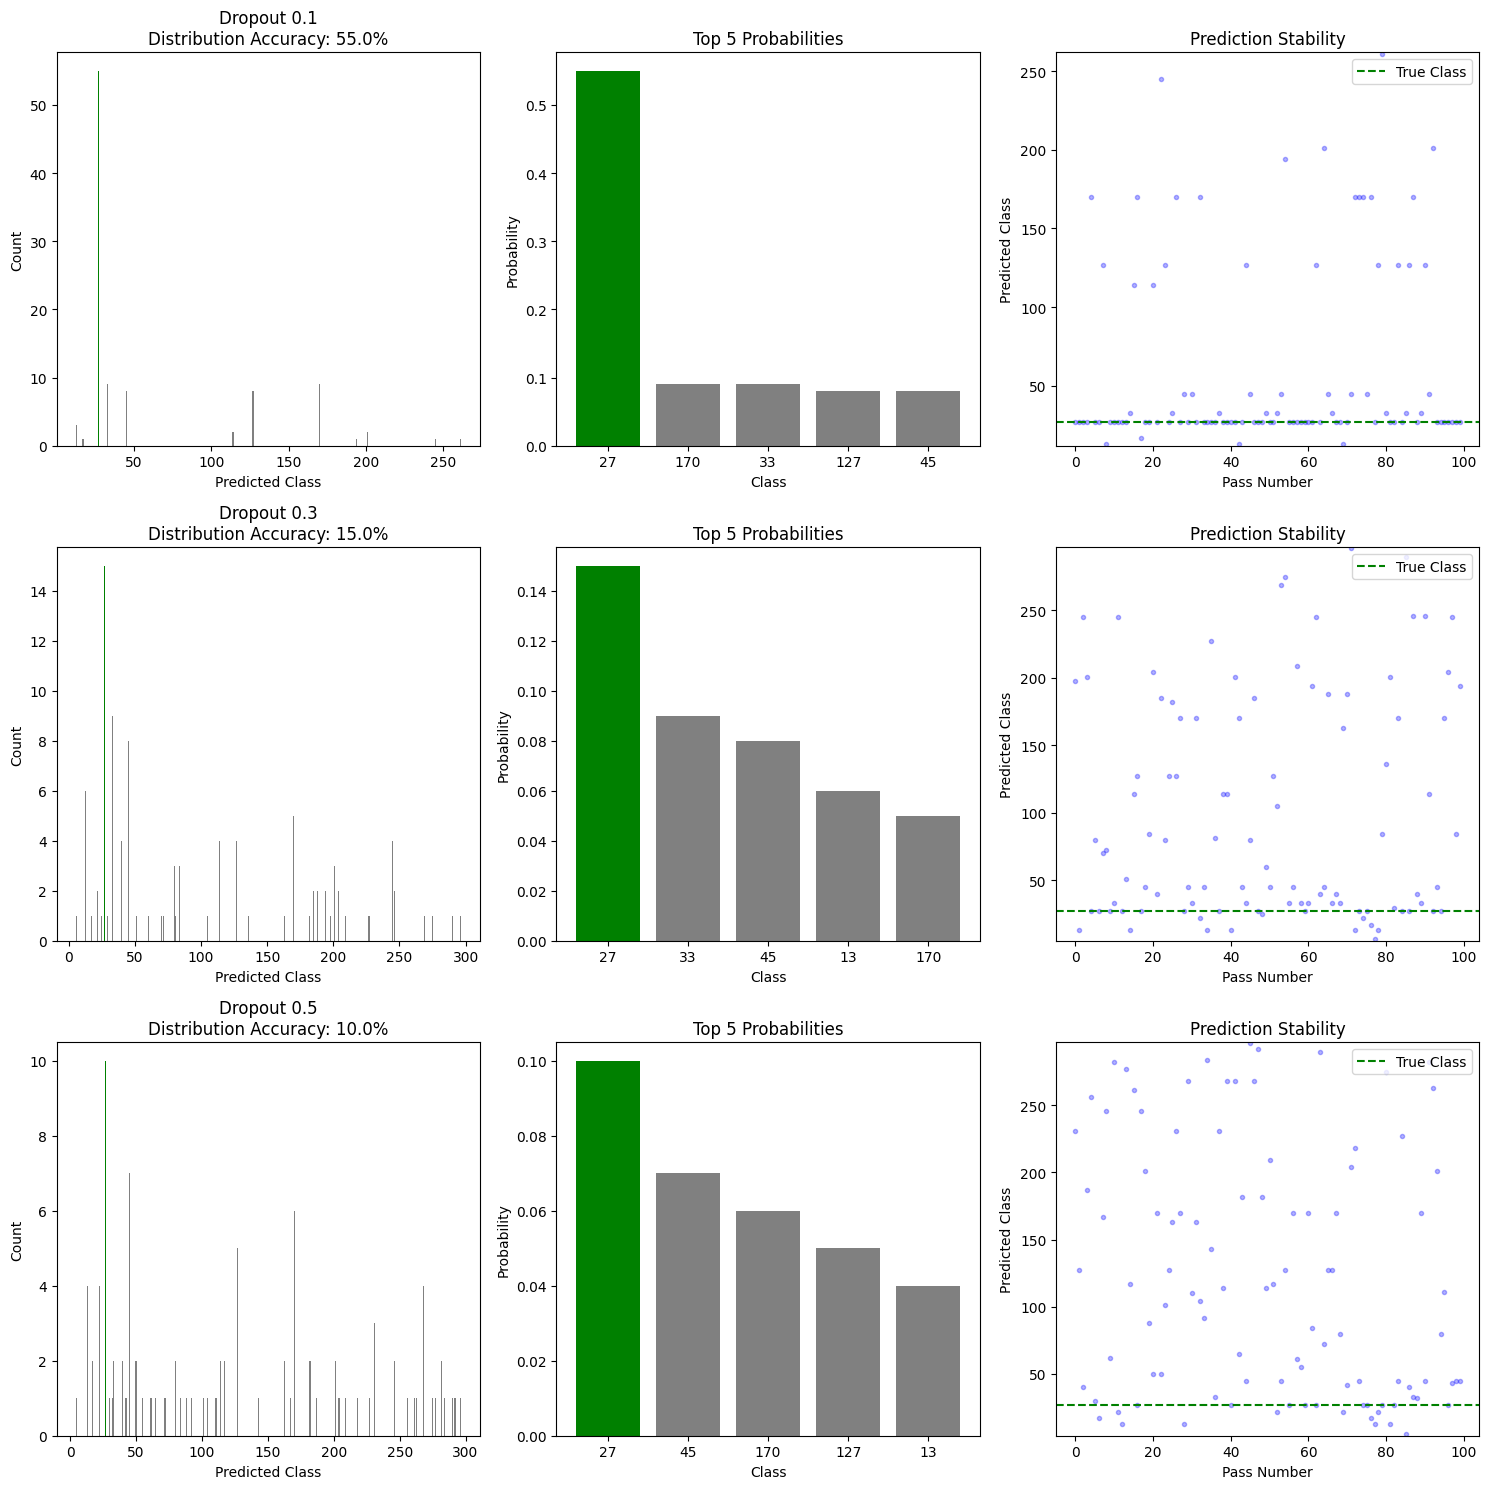

In [ ]:
# Setup
sample_idx = 37
image, true_label = test_dataset[sample_idx]
image = image.to(device)
dropout_rates = [0.1, 0.3, 0.5]
passes = 100

# Create subplot grid
n_rates = len(dropout_rates)
fig = plt.figure(figsize=(15, 5*n_rates))

for rate_idx, rate in enumerate(dropout_rates):
    # Set dropout rate
    for m in model.model.modules():
        if isinstance(m, (nn.Dropout, nn.Dropout2d)):
            m.p = rate

    # Collect predictions
    predictions = []
    model.enable_dropout()
    with torch.no_grad():
        for _ in range(passes):
            outputs = model(image.unsqueeze(0))
            pred = torch.argmax(outputs)
            predictions.append(pred.cpu().item())

    # Calculate statistics
    unique_preds, counts = np.unique(predictions, return_counts=True)
    pred_probs = counts / passes
    top_indices = np.argsort(pred_probs)[-5:][::-1]
    top_classes = unique_preds[top_indices]
    top_probs = pred_probs[top_indices]
    accuracy = (np.array(predictions) == true_label).mean() * 100

    # Plot results for current rate
    row_start = rate_idx * 3

    plt.subplot(n_rates, 3, row_start + 1)
    colors = ['green' if pred == true_label else 'gray' for pred in unique_preds]
    plt.bar(unique_preds, counts, color=colors)
    plt.title(f'Dropout {rate}\nDistribution Accuracy: {accuracy:.1f}%')
    plt.xlabel('Predicted Class')
    plt.ylabel('Count')

    plt.subplot(n_rates, 3, row_start + 2)
    colors = ['green' if cls == true_label else 'gray' for cls in top_classes]
    plt.bar(range(5), top_probs, color=colors)
    plt.title('Top 5 Probabilities')
    plt.xlabel('Class')
    plt.ylabel('Probability')
    plt.xticks(range(5), top_classes)

    plt.subplot(n_rates, 3, row_start + 3)
    plt.plot(range(passes), predictions, 'b.', alpha=0.3)
    plt.axhline(y=true_label, color='g', linestyle='--', label='True Class')
    plt.title('Prediction Stability')
    plt.xlabel('Pass Number')
    plt.ylabel('Predicted Class')
    plt.legend(loc='upper right', bbox_to_anchor=(1, 1))  # Fix legend position
    plt.ylim(min(predictions) - 1, max(predictions) + 1)  # Consistent y-axis scale

plt.tight_layout()
plt.show()

## Model Uncertainty Evaluation

This block evaluates model uncertainty across multiple dropout rates (`[0, 0.1, 0.3, 0.5]`), where `0` represents the baseline model without dropout for benchmarking. For each dropout rate, predictions are collected over 10 forward passes for batches of test data.  

In [ ]:
# Setup
dropout_rates = [0, 0.1, 0.3, 0.5]
passes = 10

# Create storage for all rates
all_data = {rate: {'confidence': [], 'entropy': [], 'correct': []} for rate in dropout_rates}


# Create a DataLoader for test dataset with batch size 32
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Collect data for each dropout rate
for rate in dropout_rates:
    print(f"\nProcessing dropout rate: {rate}")

    # Set dropout rate
    for m in model.model.modules():
        if isinstance(m, (nn.Dropout, nn.Dropout2d)):
            m.p = rate

    # Process each batch using tqdm
    for images, true_labels in tqdm(test_loader):
        images = images.to(device)

        # Multiple forward passes
        sample_predictions = []
        with torch.no_grad():
            for _ in range(passes):
                outputs = model(images)
                probs = torch.nn.functional.softmax(outputs, dim=1)
                sample_predictions.append(probs.cpu().numpy())

        # Calculate metrics for the batch
        mean_probs = np.mean(sample_predictions, axis=0)
        confidence = np.max(mean_probs, axis=1)
        entropy = -np.sum(mean_probs * np.log(mean_probs + 1e-12), axis=1)
        pred_classes = np.argmax(mean_probs, axis=1)
        is_correct = (pred_classes == true_labels.numpy())

        # Store results
        all_data[rate]['confidence'].extend(confidence)
        all_data[rate]['entropy'].extend(entropy)
        all_data[rate]['correct'].extend(is_correct)


Processing dropout rate: 0


100%|██████████| 57/57 [01:05<00:00,  1.16s/it]



Processing dropout rate: 0.1


100%|██████████| 57/57 [01:06<00:00,  1.16s/it]



Processing dropout rate: 0.3


100%|██████████| 57/57 [01:05<00:00,  1.15s/it]



Processing dropout rate: 0.5


100%|██████████| 57/57 [01:05<00:00,  1.15s/it]


### Visualization and Metrics

1. **Entropy Distribution:**  
   KDE plots compare entropy for correct (solid lines) and incorrect (dotted lines) predictions across dropout rates.  
  - Correct predictions consistently show lower entropy, indicating high confidence and less uncertainty, while incorrect predictions exhibit higher entropy, reflecting greater uncertainty.  
  - As dropout increases, entropy distributions broaden slightly, reflecting increased model uncertainty.  
  - Importantly, the gap between correct and incorrect entropy distributions is maintained, reaffirming entropy as a reliable metric for distinguishing correct vs. incorrect predictions.

2. **Confidence Distribution:**  
   KDE plots show confidence scores for correct and incorrect predictions under varying dropout rates.  
  - Confidence is inversely related to entropy, decreasing as dropout increases and shifting distributions leftward, reflecting greater uncertainty.  
  - Correct predictions exhibit a broader range of confidence, while incorrect predictions cluster more narrowly at lower confidence levels. This suggests the model often "knew it didn't know" for misclassifications, while sometimes being uncertain even when correct.  
  - Overlap between correct and incorrect distributions increases slightly at higher dropout rates, particularly around the 0.2–0.4 confidence range. This highlights potential calibration improvements, as a well-calibrated model might exhibit less overlap.

3. **Calibration Curves:**  
   Comparison between predicted confidence with actual correctness.  
  - Calibration curves deviate from the diagonal at lower confidence levels, showing the model is not very well calibrated.
  - The baseline model (`dropout = 0`) is the most calibrated, while higher dropout rates (`0.3` and `0.5`) show more noticeable misalignment.  
  - The model appears better calibrated at lower dropout rates, consistent with trends observed in the entropy and confidence plots.

4. **Metrics:**  
    Accuracy decreases with higher dropout rates, declining from 79.59% at baseline (dropout = 0) to 78.48% at dropout rate 0.5. Mean confidence shows a more pronounced drop, falling from 56.17% to 49.26%. As dropout rates increase, mean entropy rises from 2.43 to 2.80, accompanied by a small increase in Expected Calibration Error (ECE) from 0.26 to 0.29, suggesting a slight degradation in model calibration despite more conservative predictions.


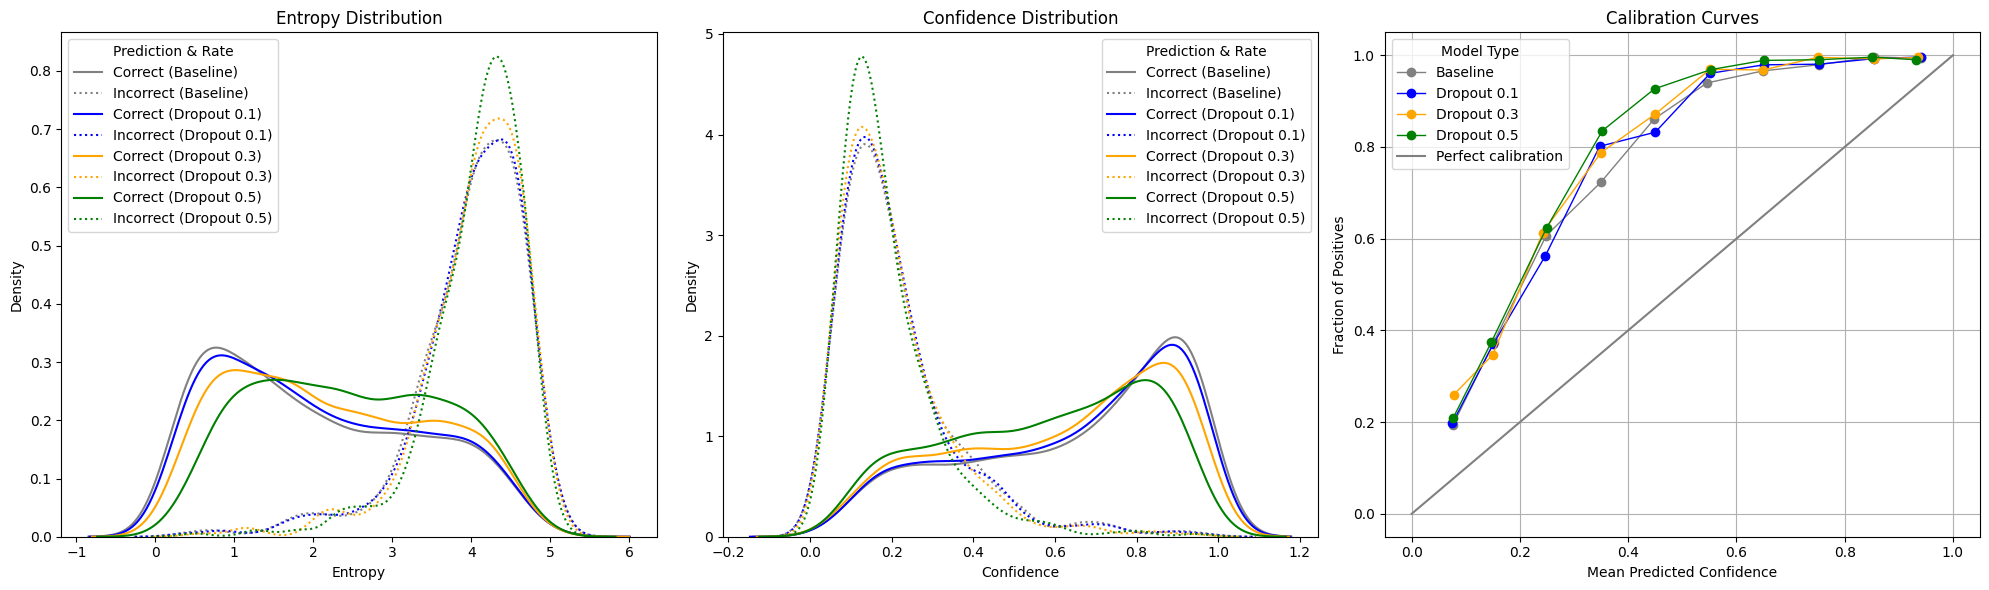


Uncertainty Metrics Comparison:
                     Baseline    0.1    0.3    0.5
Accuracy (%)            79.59  79.37  79.31  78.48
Mean Confidence (%)     56.17  55.29  53.06  49.26
Mean Entropy             2.43   2.48   2.61   2.80
ECE                      0.26   0.27   0.28   0.29


In [ ]:
# Create figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Define colors for each dropout rate
colors = ['grey', 'blue', 'orange', 'green']

# Convert dropout rate labels
def get_rate_label(rate):
    return 'Baseline' if rate == 0 else f'Dropout {rate}'

# 1. Entropy Distribution
for i, rate in enumerate(dropout_rates):
    df = pd.DataFrame({
        'entropy': all_data[rate]['entropy'],
        'correct': all_data[rate]['correct'],
        'dropout': get_rate_label(rate)
    })
    # Plot correct predictions with solid line
    correct_mask = df['correct']
    sns.kdeplot(data=df[correct_mask], x='entropy', ax=ax1,
                label=f'Correct ({get_rate_label(rate)})', color=colors[i], linestyle='-')
    # Plot incorrect predictions with dotted line
    sns.kdeplot(data=df[~correct_mask], x='entropy', ax=ax1,
                label=f'Incorrect ({get_rate_label(rate)})', color=colors[i], linestyle=':')

ax1.set_title('Entropy Distribution')
ax1.set_xlabel('Entropy')
ax1.set_ylabel('Density')
ax1.legend(title='Prediction & Rate')

# 2. Confidence Distribution
for i, rate in enumerate(dropout_rates):
    df = pd.DataFrame({
        'confidence': all_data[rate]['confidence'],
        'correct': all_data[rate]['correct'],
        'dropout': get_rate_label(rate)
    })
    # Plot correct predictions with solid line
    correct_mask = df['correct']
    sns.kdeplot(data=df[correct_mask], x='confidence', ax=ax2,
                label=f'Correct ({get_rate_label(rate)})', color=colors[i], linestyle='-')
    # Plot incorrect predictions with dotted line
    sns.kdeplot(data=df[~correct_mask], x='confidence', ax=ax2,
                label=f'Incorrect ({get_rate_label(rate)})', color=colors[i], linestyle=':')

ax2.set_title('Confidence Distribution')
ax2.set_xlabel('Confidence')
ax2.set_ylabel('Density')
ax2.legend(title='Prediction & Rate')

# 3. Calibration Curves
for i, rate in enumerate(dropout_rates):
    prob_true, prob_pred = calibration_curve(
        all_data[rate]['correct'],
        all_data[rate]['confidence'],
        n_bins=10
    )
    ax3.plot(prob_pred, prob_true, marker='o', linewidth=1,
             label=get_rate_label(rate), color=colors[i])

ax3.plot([0, 1], [0, 1], linestyle='-', color='gray', label='Perfect calibration')
ax3.set_title('Calibration Curves')
ax3.set_xlabel('Mean Predicted Confidence')
ax3.set_ylabel('Fraction of Positives')
ax3.legend(title='Model Type')
ax3.grid(True)

plt.tight_layout()
plt.show()


# Calculate statistics for each dropout rate
stats = {}
for rate in dropout_rates:
    # Get data for this rate
    correct = np.array(all_data[rate]['correct'])
    confidence = np.array(all_data[rate]['confidence'])
    entropy = np.array(all_data[rate]['entropy'])

    # Basic accuracy and confidence stats
    accuracy = correct.mean() * 100
    mean_confidence = confidence.mean() * 100
    mean_entropy = entropy.mean()

    # ECE (Expected Calibration Error)
    prob_true, prob_pred = calibration_curve(correct, confidence, n_bins=10)
    ece = np.abs(prob_true - prob_pred).mean()

    # Store stats with appropriate label
    rate_label = 'Baseline' if rate == 0 else str(rate)
    stats[rate_label] = {
        'Accuracy (%)': accuracy,
        'Mean Confidence (%)': mean_confidence,
        'Mean Entropy': mean_entropy,
        'ECE': ece,
    }

# Create DataFrame
df_stats = pd.DataFrame(stats).round(2)
print("\nUncertainty Metrics Comparison:")
print(df_stats)

# Deep Ensemble

This section shows how to implement Ensemble Methods (EM) for uncertainty estimation using three pre-trained models  `DenseNet121`, `Inception-ResNet-v2` and `EfficientNetV2-S`. These models are preloaded for convenience.

Ensemble Methods aggregate predictions from multiple independently trained models (ensemble members) to improve: (i) Prediction Accuracy, by averaging outputs, EM reduces noise and errors; (ii) Robustness, The diverse perspectives of different models help capture a broader range of data features; and (iii) Uncertainty Estimation, variability in predictions across ensemble members can quantify uncertainty.

Steps:
- **Generate Model Predictions:** For each pre-trained model, generate predictions for the entire test dataset.
-**Aggregate Predictions:** Average the probabilities predicted by ensemble members for each class to obtain the final ensemble output.
-**Calculate Variance for Uncertainty:** The variance across the ensemble’s predictions serves as a measure of uncertainty.y.els.

##1) Perform EM and Evaluate Performance

The following functions: perform the ensemble by averaging the predicted probabilities from all ensemble members for each class, and evaluate the ensemble's performance by measuring its accuracy. The accuracy of individual models in presented to compare with the ensemble's performance, highlighting the benefits of ensemble methods

In [ ]:
# Function to perform EM
def ensemble_methods(loaded_models, dataloader, device):
    ensemble_predictions = []

    for inputs, _ in dataloader:  # Assuming labels are not required
        inputs = inputs.to(device)
        model_predictions = []

        # Get predictions from each model
        for model_name, model in loaded_models.items():
            with torch.no_grad():
                logits = model(inputs)  # Forward pass
                probabilities = torch.softmax(logits, dim=1)  # Convert logits to probabilities
                model_predictions.append(probabilities.cpu().numpy())

        # Average probabilities across models
        avg_prediction = np.mean(model_predictions, axis=0)
        ensemble_predictions.append(avg_prediction)

    return np.vstack(ensemble_predictions)  # Combine all predictions

# Function to evaluate EM performance
def evaluate_ensemble(ensemble_outputs, dataloader):
    total = 0
    correct = 0

    # Get ground-truth labels from the dataloader
    true_labels = []
    for _, labels in dataloader:
        true_labels.extend(labels.numpy())

    # Predicted class is the one with the highest probability
    predicted_classes = np.argmax(ensemble_outputs, axis=1)

    # Compare predictions with true labels
    correct = (predicted_classes == np.array(true_labels)).sum()
    total = len(true_labels)

    accuracy = (correct / total) * 100
    return accuracy

# Function to evaluate individual models accuracy
def evaluate_model_accuracy(model, dataloader, device):
    total = 0
    correct = 0

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            logits = model(inputs)
            predictions = torch.argmax(logits, dim=1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

    accuracy = (correct / total) * 100
    return accuracy

# Compute individual model accuracies
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Set device
model_accuracies = {}

print("Evaluating individual models...")
for model_name, model in loaded_models.items():
    model.eval()  # Ensure the model is in evaluation mode
    accuracy = evaluate_model_accuracy(model, test_loader, device)
    model_accuracies[model_name] = accuracy
    print(f"Accuracy of {model_name}: {accuracy:.2f}%")

# Perform ensemble method
print("\nPerforming ensemble evaluation...")
ensemble_outputs = ensemble_methods(loaded_models, test_loader, device)

# Evaluate ensemble accuracy
ensemble_accuracy = evaluate_ensemble(ensemble_outputs, test_loader)
print(f"\nEnsemble Accuracy: {ensemble_accuracy:.2f}%")


##2) Visualize distributions

The following functions collect the outputs (logits) from the ensemble members and average them to compute the EM. Based on these outputs, the distributions of each model’s logits for a specific class are visualized.

Logits are the raw scores output by the model before the final layer or the probability generation step for each class. These scores are real numbers representing how strongly the model "believes" in each class: large positive logits indicate high confidence, and negative logits indicate low confidence for the corresponding class.

In the graph displayed next, we observe the distribution of logits for the three models and the ensemble method when predicting class 27 for the entire test dataset. The green line represents the distribution of the EfficientNetV2-S model, which has a higher mean than the other models. This shows that the EfficientNetV2-S model predicts class 27 with more confidence than the other two models. The EM combines the predictions of the three models, and its variance quantifies the uncertainty among them.

In [ ]:
# Function to get outputs (logits)
def collect_model_outputs(models, dataloader, device):
    outputs = {model_name: [] for model_name in models.keys()}

    for inputs, _ in dataloader:  # Assuming labels are not needed
        inputs = inputs.to(device)

        for model_name, model in models.items():
            model.eval()
            with torch.no_grad():
                logits = model(inputs)  # Get raw logits
                outputs[model_name].append(logits.cpu().numpy())

    # Combine all outputs into a single array for each model
    for model_name in outputs.keys():
        outputs[model_name] = np.vstack(outputs[model_name])

    return outputs

# Function to calculate ensembled output by averaging indivudual outputs (logits)
def compute_ensemble_outputs(outputs):
    # Stack model outputs (logits): Shape (num_models, num_samples, num_classes)
    stacked_outputs = np.stack(list(outputs.values()), axis=0)

    # Average logits across models
    ensemble_logits = np.mean(stacked_outputs, axis=0)

    return ensemble_logits

# Function to plot output distributions for specific class
def plot_output_distributions(outputs, ensemble_logits, class_idx=0):
    plt.figure(figsize=(12, 8))

    # Plot each model's output distribution
    for model_name, logits in outputs.items():
        sns.kdeplot(logits[:, class_idx], label=f'{model_name} Outputs', linewidth=0.5)

    # Plot ensemble output distribution
    sns.kdeplot(ensemble_logits[:, class_idx], label='Ensemble Outputs', linewidth=1, color='black')

    plt.title(f'Logit Distribution for Class {class_idx}')
    plt.xlabel('Logit Value')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Plot output distributions for a specific class
outputs = collect_model_outputs(loaded_models, test_loader, device) #Get individual model outputs
ensemble_logits = compute_ensemble_outputs(outputs) #Compute ensemble outputs (average logits)
class_idx=27
plot_output_distributions(outputs, ensemble_logits, class_idx)

##3) Accuracy and Stability

To evaluate the accuracy and stability of the EM, we estimate its uncertainty using 100 stochastic forward passes. This is achieved by: (i) enabling dropout during inference for each ensemble member; (ii) collecting predictions or probabilities and aggregating them to calculate the ensemble prediction; and (iii) analyzing the variability across the predictions or probabilities to estimate uncertainty.The goal is to estimate the uncertainty of an EM for a specific input image by introducing randomness through dropout.

In this tutorial, the accuracy of the EM decreases notably when randomness is added through dropout. For instance, in the case of class 27 for the sample image (sample_idx=37), the probability of predicting the correct class is much lower than that of the most probable class, class 104, which ranks first. This behavior demonstrates that even with a robust method like EM, accuracy and stability can deteriorate, resulting in less certain predictions when uncertainty is introduced.nce.


In [ ]:
# Set random seeds
np.random.seed(42)
torch.manual_seed(42)

# Setup
sample_idx = 37
image, true_label = test_dataset[sample_idx]
image = image.to(device)
passes = 100  # Number of stochastic forward passes

# Collect predictions for the ensemble
ensemble_predictions = []

with torch.no_grad():
    for pass_idx in range(passes):
        pass_predictions = []  # Collect predictions from all models in the ensemble for this pass

        for model_name, model in loaded_models.items():
            model.eval()
            model.enable_dropout()  # Enable MC Dropout
            outputs = model(image.unsqueeze(0))  # Add batch dimension
            pred = torch.argmax(outputs, dim=1).cpu().item()  # Predicted class
            pass_predictions.append(pred)

        # Ensemble prediction for this pass (majority vote)
        ensemble_pred = max(set(pass_predictions), key=pass_predictions.count)  # Most common prediction
        ensemble_predictions.append(ensemble_pred)

# Calculate statistics for the ensemble
unique_preds, counts = np.unique(ensemble_predictions, return_counts=True)
pred_probs = counts / len(ensemble_predictions)
top_indices = np.argsort(pred_probs)[-5:][::-1]
top_classes = unique_preds[top_indices]
top_probs = pred_probs[top_indices]
accuracy = (np.array(ensemble_predictions) == true_label).mean() * 100

# Create plots
fig = plt.figure(figsize=(20, 5))  # Wider figure for 1-row layout

# Plot 1: Distribution of Predictions (Ensemble Only)
plt.subplot(1, 3, 1)
colors = ['green' if pred == true_label else 'gray' for pred in unique_preds]
plt.bar(unique_preds, counts, color=colors)
plt.title(f'Ensemble Prediction Distribution\nAccuracy: {accuracy:.1f}%')
plt.xlabel('Predicted Class')
plt.ylabel('Count')

# Plot 2: Top 5 Probabilities (Ensemble Only)
plt.subplot(1, 3, 2)
colors = ['green' if cls == true_label else 'gray' for cls in top_classes]
plt.bar(range(len(top_classes)), top_probs, color=colors)
plt.title('Top Ensemble Probabilities')
plt.xlabel('Class')
plt.ylabel('Probability')
plt.xticks(range(len(top_classes)), top_classes)

# Plot 3: Prediction Stability (Ensemble Only)
plt.subplot(1, 3, 3)
plt.plot(range(passes), ensemble_predictions, 'r.', alpha=0.8, label="Ensemble Prediction")  # Ensemble points
plt.axhline(y=true_label, color='green', linestyle='--', label='True Class')
plt.title('Prediction Stability (Ensemble Only)')
plt.xlabel('Pass Number')
plt.ylabel('Predicted Class')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.ylim(min(ensemble_predictions) - 1, max(ensemble_predictions) + 1)  # Consistent y-axis scale

plt.tight_layout()
plt.show()



<a name="results-and-discussion"></a>
# Discussion

Due to the different characteristics and nature of the method presented, it is not within the scope of this tutorial to provide a meaningful comparison. Further parameter tuning and aligned testing would be necessary. Each section above provides a start for interpretation.

The table provided in the overview section indicates usage and limitations of the methods, which can help for the decision which method to take. As a key take-away, the ECE can be remembered as a powerful metric for calibration, able to deal with very different uncertainy estimation approaches as presented abouve.

## Expected Calibration Error (ECE) and Trade-off

**What is ECE?**

In classification tasks, machine learning models often output probabilities (confidences) for their predictions, representing how certain the model is about its predictions. However, these probabilities may not be well-aligned with the actual true probabilities of the predicted events. This misalignment is called miscalibration, and it means the model's confidence scores may not reliably indicate its accuracy.

The Expected Calibration Error (ECE) is a metric that helps measure how well-calibrated a model's predicted probabilities are. It computes the weighted average difference between the predicted confidence and the true accuracy across different probability bins. A lower ECE indicates better calibration, meaning the model's predictions are more reliable.

**The Trade-Off Between Accuracy, F1-Score, and ECE**

When evaluating models, we often face a trade-off between different metrics like accuracy, F1-score, and ECE, each emphasizing different aspects of model performance:

1. Accuracy focuses on how many predictions the model gets right but does not consider the confidence or reliability of these predictions.

2. F1-Score emphasizes the balance between precision and recall, particularly important in imbalanced datasets, but again does not account for the confidence of predictions.

3. ECE measures the calibration of the model—whether the predicted probabilities reflect the true likelihood of correctness. A highly accurate model may still have a high ECE if it is poorly calibrated (e.g., it may confidently predict incorrect labels).

**Prioritizing Accuracy/F1-Score**: Often results in models that are confident but not necessarily calibrated, meaning their confidence scores may over- or understate the true probability of being correct.

**Prioritizing Calibration (ECE)**: May require sacrificing some accuracy or F1-score to achieve better alignment between confidence scores and true probabilities. This is particularly important in critical applications where overconfidence can lead to risky decisions (e.g., medical diagnostics or autonomous vehicles).
Thus, choosing between accuracy, F1-score, and ECE depends on the specific requirements of the application.

For instance: In high-stakes scenarios, low ECE may be prioritized to ensure predictions are reliable. For tasks like spam detection, F1-score or accuracy might take precedence over calibration. Balancing these metrics is key for building robust and reliable models.




## Limitations

This tutorial is designed with a focus on education and learning, and as such, several simplifications have been made compared to applying these methods in real-world scenarios. The dataset has been significantly reduced to make experiments computationally efficient and accessible, and the methods were only tested on a subset of the data or a single class, limiting the scope of analysis. Models were also chosen to meet the scope of compute for Coalb rather than for best performance. Additionally, the emphasis was placed on understanding the underlying mechanisms of uncertainty estimation methods rather than achieving optimal performance through extensive parameter tuning. As highlighted by Ståhl et al. (2020) in their uncertainty study, "the methods available capture the uncertainty differently, and the correlation between the quantified uncertainty of the models is low." This inconsistency underscores the need for further research and refinement before AI can be trusted for critical applications in a safe and reliable manner.

## Next Steps

* If you want to implement an uncertainty estimation method, make sure to check out the table in the overview and analyze what fits best to your use case.
* Keep an eye open for new cutting edge research on uncertainty methods, since this is an evolving field with a lot to discover! 📚

<a name="references"></a>
# References

Include all references used.

* Gawlikowski et al. (2023). A survey of uncertainty in deep neural networks. Artif Intell Rev 56 (Suppl 1), 1513–1589 (2023). https://doi.org/10.1007/s10462-023-10562-9

* Alex Kendall & Yarin Gal (2017). What Uncertainties Do We Need in Bayesian Deep Learning for Computer Vision? https://arxiv.org/abs/1703.04977

* Ståhl, N., Falkman, G., Karlsson, A., & Mathiason, G. (2020). Evaluation of Uncertainty Quantification in Deep Learning. Information Processing and Management of Uncertainty in Knowledge-Based Systems, 1237, 556 - 568. [Link](https://www.semanticscholar.org/paper/Evaluation-of-Uncertainty-Quantification-in-Deep-St%C3%A5hl-Falkman/4f8690e5db4ae32b8df9d320cd3091f04e6ab357)

* Abdar et al. (2021): A review of uncertainty quantification in deep learning: Techniques, applications and challenges. [Link](https://www.sciencedirect.com/science/article/pii/S1566253521001081)

* Wang, C. (2024): Calibration in Deep Learning: A Survey of the State-of-the-Art. Comment: 30 pages, Ongoing work. [Link](https://arxiv.org/abs/2308.01222)

* Dataset Credit: Multimedia Laboratory, Chinese University of Hong Kong. [Link](https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html)


* Cover image: [Risk and Uncertainty in Deep Learning](https://gdmarmerola.github.io/risk-and-uncertainty-deep-learning/)



